In [1]:
import math
import torch
import ntwrk
from ntwrk.bayesopt import BayesOpt, BayesOptCongestion

import gym
import sys
sys.path.append("../ntwrk/gym/")
import network_sim
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# env = gym.make("PccNs-v0")
# env.reset()

def env(x, noise=0.02):
    return -torch.sin(3 * (x-1.)) - (x - 1.).pow(2) + 0.7 * (x-1.) + noise * torch.randn(x.shape)

In [3]:
x = torch.rand(3) * 3.
y = env(x)

test_pts = torch.linspace(0, 3., 200)

bayesopt = BayesOpt(x, y, max_x=3.)

In [4]:
bayesopt.train_surrogate(iters=200)

In [5]:
bayesopt.surrogate_lh.eval()
bayesopt.surrogate.eval()

pred_dist = bayesopt.surrogate_lh(bayesopt.surrogate(test_pts))

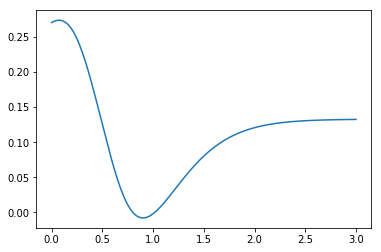

In [6]:
plt.plot(test_pts, pred_dist.mean.detach())
plt.show()

In [9]:
bayesopt.surrogate_lh.train()
bayesopt.surrogate.train()

Surrogate(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (mean_module): ConstantMean()
  (covar_module): ScaleKernel(
    (base_kernel): MaternKernel(
      (raw_lengthscale_constraint): Positive()
      (distance_module): Distance()
    )
    (raw_outputscale_constraint): Positive()
  )
)

In [10]:
BOC = BayesOptCongestion(bayesopt, env=env, step_window=10)

In [11]:
rates, rwrds = BOC.run_bayesopt(explore=0.01)

NanError: cholesky_cpu: 6 of 9 elements of the torch.Size([3, 3]) tensor are NaN.